In [25]:
import pandas as pd


In [26]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
data = pd.read_csv(url, names=columns, na_values="?")

In [3]:
#!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyl

In [27]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [29]:
data.dropna(inplace=True)

In [30]:
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "num"]
for col in categorical_cols:
    data[col] = data[col].astype('category').cat.codes

In [31]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1,0,145.0,233.0,1,2,150.0,0,2.3,2,0,1,0
1,67.0,1,3,160.0,286.0,0,2,108.0,1,1.5,1,3,0,2
2,67.0,1,3,120.0,229.0,0,2,129.0,1,2.6,1,2,2,1
3,37.0,1,2,130.0,250.0,0,0,187.0,0,3.5,2,0,0,0
4,41.0,0,1,130.0,204.0,0,2,172.0,0,1.4,0,0,0,0


In [32]:
from pgmpy.models import BayesianNetwork

In [33]:
model = BayesianNetwork([
    ('age', 'cp'),
    ('sex', 'cp'),
    ('cp', 'num'),
    ('trestbps', 'num'),
    ('chol', 'num')
])

In [34]:
from pgmpy.estimators import MaximumLikelihoodEstimator

In [35]:
model.fit(data, estimator=MaximumLikelihoodEstimator)

In [36]:
from pgmpy.inference import VariableElimination

In [37]:
inference = VariableElimination(model)

In [38]:
query_result = inference.query(variables=['num'],
                               evidence={'age': 55, 'sex': 1, 'cp': 0})

print(query_result)

+--------+------------+
| num    |   phi(num) |
+========+============+
| num(0) |     0.2058 |
+--------+------------+
| num(1) |     0.1993 |
+--------+------------+
| num(2) |     0.1981 |
+--------+------------+
| num(3) |     0.1978 |
+--------+------------+
| num(4) |     0.1990 |
+--------+------------+


In [39]:
import networkx as nx

In [40]:
G = nx.DiGraph()
G.add_edges_from(model.edges())

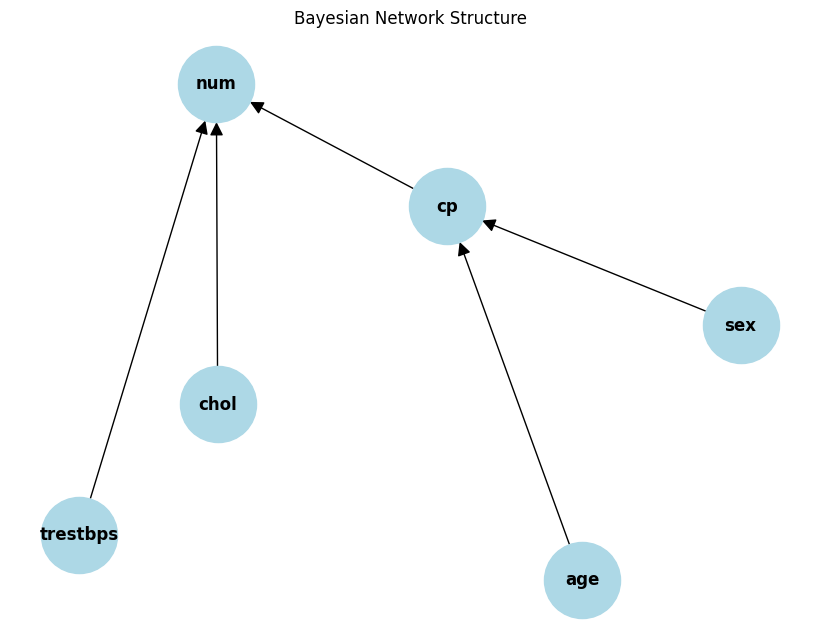

In [41]:
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold', arrowsize=20)
plt.title('Bayesian Network Structure')
plt.show()

In [42]:
inference = VariableElimination(model)

In [43]:
conditions = [
    {'age': 55, 'sex': 1, 'cp': 0},
    {'age': 65, 'sex': 0, 'cp': 1},
    {'age': 45, 'sex': 1, 'cp': 2}
]

In [44]:
results = []
for condition in conditions:
    result = inference.query(variables=['num'], evidence=condition)
    results.append(result.values[1])

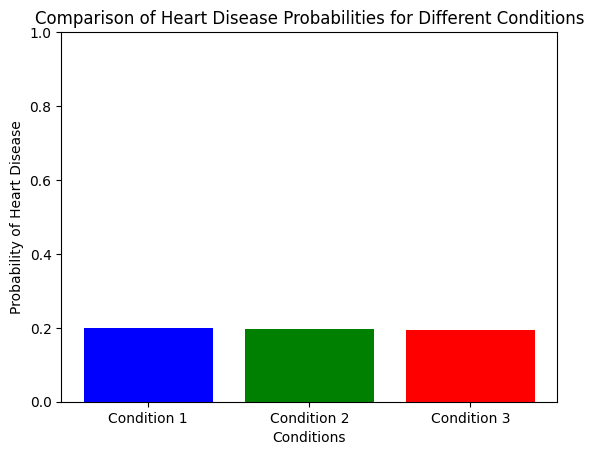

In [45]:
labels = ['Condition 1', 'Condition 2', 'Condition 3']
plt.bar(labels, results, color=['blue', 'green', 'red'])
plt.xlabel('Conditions')
plt.ylabel('Probability of Heart Disease')
plt.title('Comparison of Heart Disease Probabilities for Different Conditions')
plt.ylim(0, 1)
plt.show()